In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model

In [3]:
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D,MaxPooling2D
from tensorflow.keras import regularizers,optimizers
from tensorflow.keras.utils import to_categorical
from sklearn .metrics import accuracy_score

تبدو أنك تقوم بتحميل مكتبات Keras و TensorFlow لبناء نموذج تعلم آلي لمعالجة الصور. الكود الذي قمت بتوفيره يقوم بتحميل المكتبات وتعريف نموذج الشبكة العصبية.

هنا توضيح لكل خطوة في الكود:

1. استيراد المكتبات:
   ```python
   import keras
   import tensorflow as tf
   from tensorflow import keras
   ```
   تقوم هذه الخطوط بتحميل المكتبات الضرورية لاستخدام TensorFlow و Keras.

2. تعريف نموذج Sequential:
   ```python
   from keras.models import Sequential
   model = Sequential()
   ```
   تقوم هذه الخطوط بتعريف نموذج Sequential، الذي يمثل نموذجًا تسلسليًا للطبقات في الشبكة العصبية.

3. استيراد الطبقات والمكونات اللازمة:
   ```python
   from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
   from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
   from tensorflow.keras.layers import BatchNormalization
   ```
   يتم استيراد الطبقات والمكونات اللازمة لبناء الشبكة العصبية، مثل Conv2D للتصفية المكانية، و Dense للطبقة الكاملة المتصلة، و BatchNormalization لتحسين تدريب الشبكة، وغيرها.

4. تعريف نموذج الشبكة العصبية:
   ```python
   from tensorflow.keras.models import Model
   from tensorflow.keras import regularizers, optimizers
   ```
   تعريف نموذج الشبكة العصبية واستيراد التقنيات المختلفة المستخدمة في النموذج، مثل الانحدار والمحسنين.

5. تحويل العلامات إلى تنسيق فئوي:
   ```python
   from tensorflow.keras.utils import to_categorical
   ```
   يقوم هذا السطر بتحويل العلامات (labels) إلى تنسيق فئوي.

هذه الخطوات هي الخطوات الأساسية لبناء نموذج تعلم آلي باستخدام TensorFlow و Keras. إذا كنت تحتاج إلى مزيد من المساعدة في بناء النموذج أو استخدامه، فلا تتردد في طرح الأسئلة!

In [4]:
#Data
from tensorflow.keras.datasets import cifar100

In [5]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


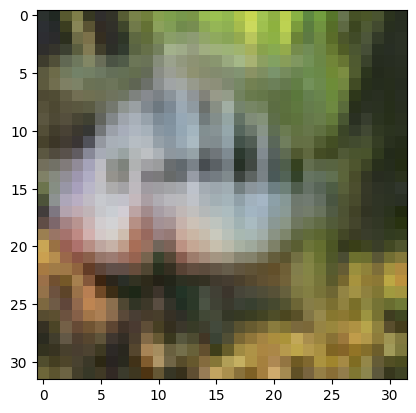

In [6]:
plt.imshow(X_train[4])

In [7]:
X_train=X_train/255
X_test=X_test/255

`يبدو أنك قمت بتقسيم قيم بيانات الصور في مجموعة التدريب `

(X_train) ومجموعة الاختبار (X_test) على 255. هذا الإجراء يستخدم لتقليل قيم البكسل إلى نطاق بين 0 و 1. قد تكون هذه الخطوة ضرورية كجزء من تحضير البيانات لتدريب النموذج الخاص بك.

عملية تقسيم القيم عادة ما تستخدم لتسهيل عملية التدريب للنموذج. على العموم، يتم استخدام هذا التقسيم بشكل شائع في تعلم الآلة لأنه يعمل على توحيد البيانات ويمكن أن يساعد في تحسين أداء النموذج.

هناك طرق أخرى لتحضير البيانات، وتعتمد على النموذج والمشكلة التي تعمل عليها. على سبيل المثال، في بعض الحالات، يمكن أن يكون من الأفضل تطبيع البيانات بشكل أكبر أو استخدام تقنيات معالجة الصور الأخرى.

إذا كان لديك أي أسئلة إضافية حول هذه الخطوة أو حول كيفية استخدام بيانات الصور في تدريب النماذج، فلا تتردد في طرحها!

In [8]:
import numpy as np

# قائمة بالعلامات الفريدة في مجموعة بيانات التدريب
unique_labels_train = np.unique(y_train)
print("Unique labels in training set:", unique_labels_train)

# قائمة بالعلامات الفريدة في مجموعة بيانات الاختبار
unique_labels_test = np.unique(y_test)
print("Unique labels in test set:", unique_labels_test)

Unique labels in training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Unique labels in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]




```
## علشان اعرف label صح ##
```



In [9]:
y_train_en=to_categorical(y_train,100)
y_test_en=to_categorical(y_test,100)

يبدو أنك تقوم بتحويل العلامات
(labels) إلى تنسيق فئوي باستخدام وظيفة `to_categorical` من TensorFlow. هذه الخطوة شائعة في تعلم الآلة عند العمل مع المشكلات التي تتضمن تصنيف أو تصنيف متعدد الفئات.

في هذه الحالة، يتم تحويل العلامات التصنيفية إلى صيغة فئوية حيث يكون لكل فئة فهرس (index) يمثل موضعها، ويتم تعيين القيمة 1 للفهرس المقابل للفئة والقيم 0 لبقية الفهارس. على سبيل المثال، إذا كانت هناك 3 فئات، فقد يكون شكل العلامات بعد التحويل كالتالي:

- 0: [1, 0, 0]
- 1: [0, 1, 0]
- 2: [0, 0, 1]

وهذا يعني أن الصفر يمثل الفئة الأولى، والواحد يمثل الفئة الثانية، وهكذا.

الوسم "10" في الوظيفة `to_categorical` يعني أن هناك 10 فئات ممكنة. هذا متطابق مع عدد الفئات في مجموعة بيانات CIFAR-10 التي تحتوي على 10 فئات مختلفة.

هذا التحويل يسهل عملية تدريب النموذج وتقييم أدائه على مجموعة الاختبار، ويجعل من السهل فهم نتائج التصنيف لأنها تكون في صيغة فئوية.

إذا كان لديك أي أسئلة أخرى، فلا تتردد في طرحها!

In [10]:
X_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

In [11]:
y_train_en

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
model=Sequential()
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation="relu")),
model.add(MaxPooling2D(pool_size=((2,2)))),
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation="relu")),
model.add(MaxPooling2D(pool_size=((2,2)))),
model.add(Flatten()),
model.add(Dense(128,activation="relu")),
model.add(Dense(100,activation="softmax"))

بالطبع، سأشرح كل سطر في الكود:

1. `model=Sequential()`: هذا السطر يقوم بإنشاء نموذج جديد باستخدام النمط السلسلي Sequential. يعني هذا أننا سنضيف الطبقات تلو الأخرى في تسلسل خطي.

2. `model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation="relu"))`: هذا السطر يضيف طبقة تصفية ثنائية الأبعاد Conv2D إلى النموذج. تتلقى هذه الطبقة 32 فلترًا بحجم 4x4، وتتوقع إدخال البيانات بشكل صور بأبعاد 32x32x3 (32 عرض، 32 ارتفاع، 3 قنوات لونية RGB). وظيفة التنشيط المستخدمة هي ReLU.

3. `model.add(MaxPooling2D(pool_size=((2,2))))`: هذا السطر يضيف طبقة تقليل البيانات MaxPooling2D إلى النموذج. يقوم هذا النوع من الطبقات بتقليل حجم البيانات عن طريق اختيار القيمة القصوى في كل منطقة محددة.

4. `model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation="relu"))`: هذا السطر يضيف طبقة Conv2D الثانية إلى النموذج، وهي نفس الطريقة المستخدمة في السطر الثاني.

5. `model.add(MaxPooling2D(pool_size=((2,2))))`: هذا السطر يضيف طبقة تقليل البيانات الثانية إلى النموذج، وهي نفس الطريقة المستخدمة في السطر الثالث.

6. `model.add(Flatten())`: هذا السطر يضيف طبقة التسطيح Flatten إلى النموذج. تقوم هذه الطبقة بتحويل البيانات من تنسيق ثلاثي الأبعاد إلى تنسيق مسطح (أحادي الأبعاد)، وهو مطلوب قبل إضافة الطبقات الكاملة المتصلة.

7. `model.add(Dense(128,activation="relu"))`: هذا السطر يضيف طبقة كاملة متصلة Dense إلى النموذج، وتحتوي على 128 وحدة. وظيفة التنشيط المستخدمة هي ReLU.

8. `model.add(Dense(100,activation="softmax"))`: هذا السطر يضيف طبقة كاملة متصلة أخرى إلى النموذج، وتحتوي على 100 وحدة (بالتنسيق مع عدد الفئات في بيانات CIFAR-100). وظيفة التنشيط المستخدمة هي Softmax، وهي مفيدة للتصنيف متعدد الفئات حيث تقوم بإخراج توزيع احتمالات لكل فئة محتملة.

هذه الطبقات تشكل نموذجًا أساسيًا للتصنيف الصوري، حيث يتم استخدام الطبقات التصفية (Conv2D) لاستخراج الميزات، وطبقات تقليل البيانات (MaxPooling2D) لتقليل حجم البيانات، ثم طبقات كاملة متصلة (Dense) لإجراء التصنيف الفعلي.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train_en,epochs=100,verbose=1,validation_batch_size=(X_test,y_test_en))

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6034 - accuracy: 0.8160
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5861 - accuracy: 0.8199
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6001 - accuracy: 0.8162
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5971 - accuracy: 0.8179
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5912 - accuracy: 0.8190
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5882 - accuracy: 0.8214
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6181 - accuracy: 0.8130
Epoch 8/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5936 - accuracy: 0.8207
Epoch 9/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6055 - accuracy: 0.8158
Epoch 10/100
1563/1563 [==============================] - 6s 4ms/step - l

<Axes: >

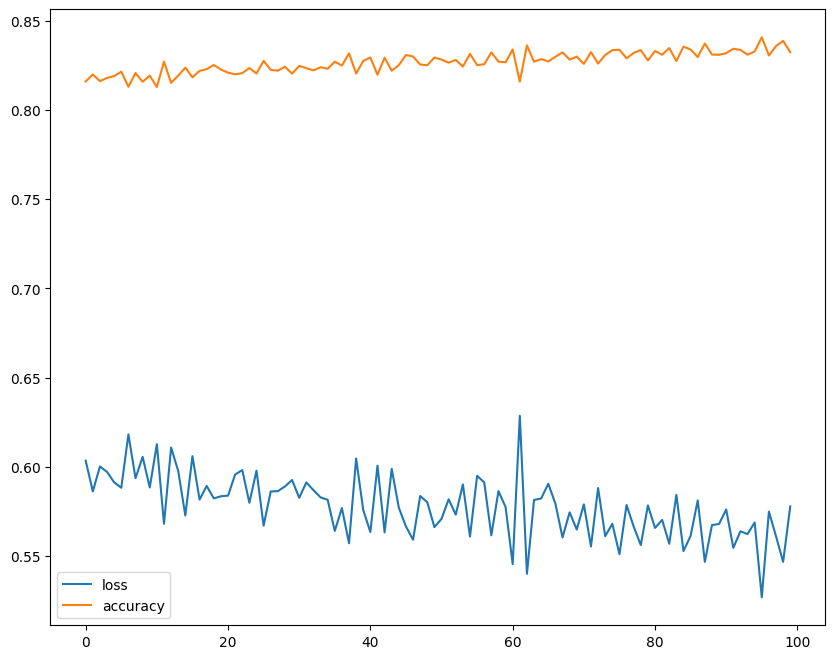

In [18]:
df=pd.DataFrame(model.history.history)
df.plot(figsize=(10,8))